# Working with survailance videos, captioning frames and detecting indoor/outdoor

In [29]:
# This notebook is a tutorial of fastdup beta advanced capabilities. Please sign up for a free version at info@visual-layer.com to unlock those and many other functionalities.


In [13]:
from IPython.display import Image

In [ ]:
# Download the fight detection survailance camera dataset

In [ ]:
!git clone https://github.com/seymanurakti/fight-detection-surv-dataset.git

In [1]:
import fastdup
!mkdir frames
fastdup.extract_video_frames('fight-detection-surv-dataset/fight/', 'frames/fight')
fastdup.extract_video_frames('fight-detection-surv-dataset/noFight/', 'frames/no-fight')


FastDup Software, (C) copyright 2022 Dr. Amir Alush and Dr. Danny Bickson.
2023-04-11 19:38:17 [INFO] Going to loop over dir fight-detection-surv-dataset/fight
2023-04-11 19:38:18 [INFO] Found total 150 videos to run on, 150 train, 0 test, name list 150, counter 150 
FastDup Software, (C) copyright 2022 Dr. Amir Alush and Dr. Danny Bickson.
2023-04-11 19:38:25 [INFO] Going to loop over dir fight-detection-surv-dataset/noFight
2023-04-11 19:38:25 [INFO] Found total 150 videos to run on, 150 train, 0 test, name list 150, counter 150 


0

## Quick preview of video frames

In [5]:
fight_files=!find frames/fight/ -name '*.jpg'
no_fight_files=!find frames/no-fight/ -name '*.jpg'

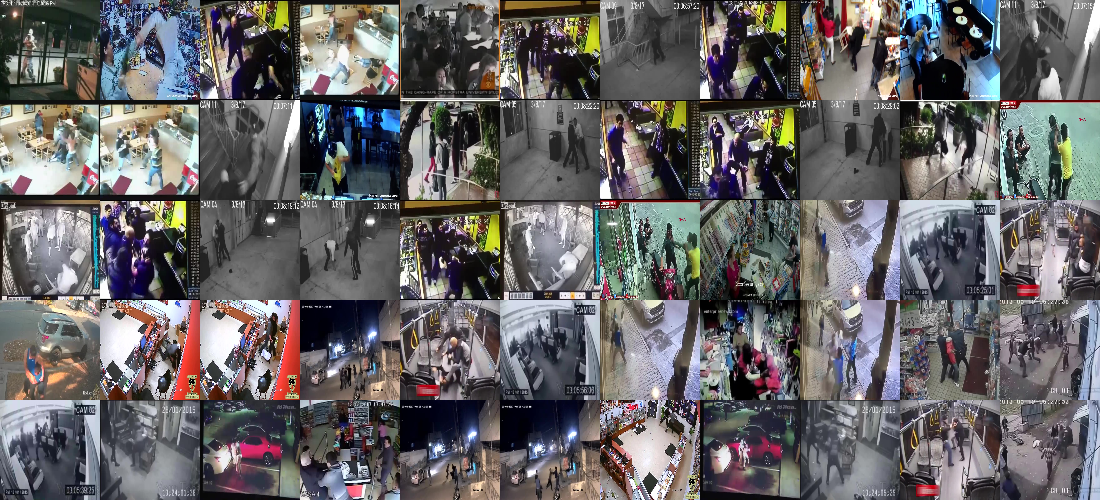

In [11]:
ret = fastdup.generate_sprite_image(fight_files, 55, ".")[0]
from IPython.display import Image
Image(filename=ret)
                              

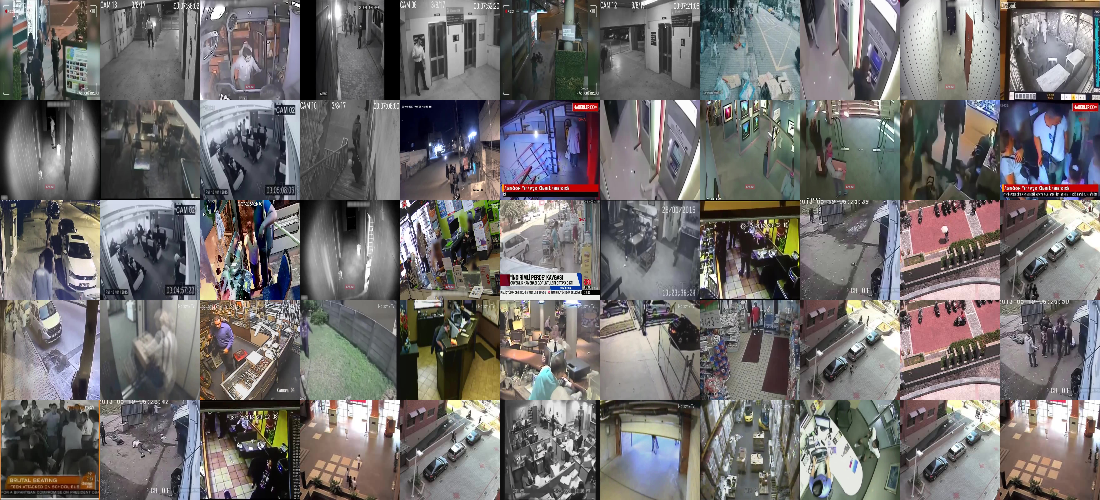

In [12]:
ret = fastdup.generate_sprite_image(no_fight_files, 55, ".")[0]
Image(filename=ret)

## Build fastdup model

In [17]:
# Cluster similar frames together
fd = fastdup.create(input_dir='frames', work_dir='out_frames')
fd.run(overwrite=True)

FastDup Software, (C) copyright 2022 Dr. Amir Alush and Dr. Danny Bickson.

 ########################################################################################

Dataset Analysis Summary: 

    Dataset contains 302 images
    Valid images are 100.00% (302) of the data, invalid are 0.00% (0) of the data
    Similarity:  8.28% (25) belong to 6 similarity clusters (components).
    91.72% (277) images do not belong to any similarity cluster.
    Largest cluster has 12 (3.97%) images.
    For a detailed analysis, use `.connected_components()`
(similarity threshold used is 0.9, connected component threshold used is 0.96).

    Outliers: 6.29% (19) of images are possible outliers, and fall in the bottom 5.00% of similarity values.
    For a detailed list of outliers, use `.outliers()`.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 103.58it/s]


Finished OK. Components are stored as image files out_frames/galleries/components_[index].jpg
Stored components visual view in  out_frames/galleries/components.html
Execution time in seconds 0.2



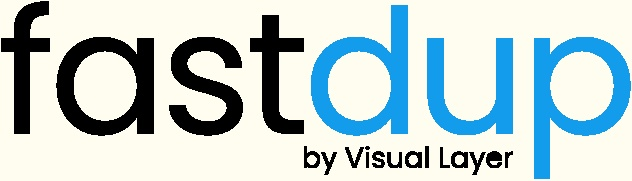
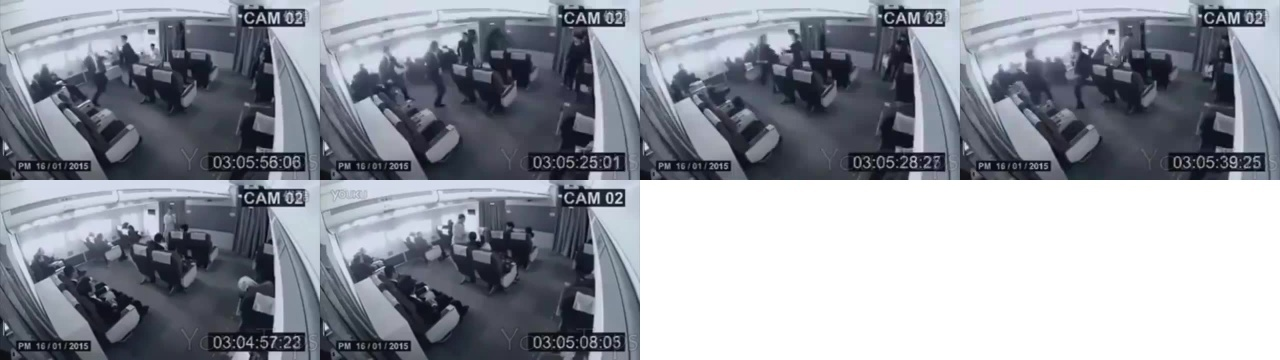
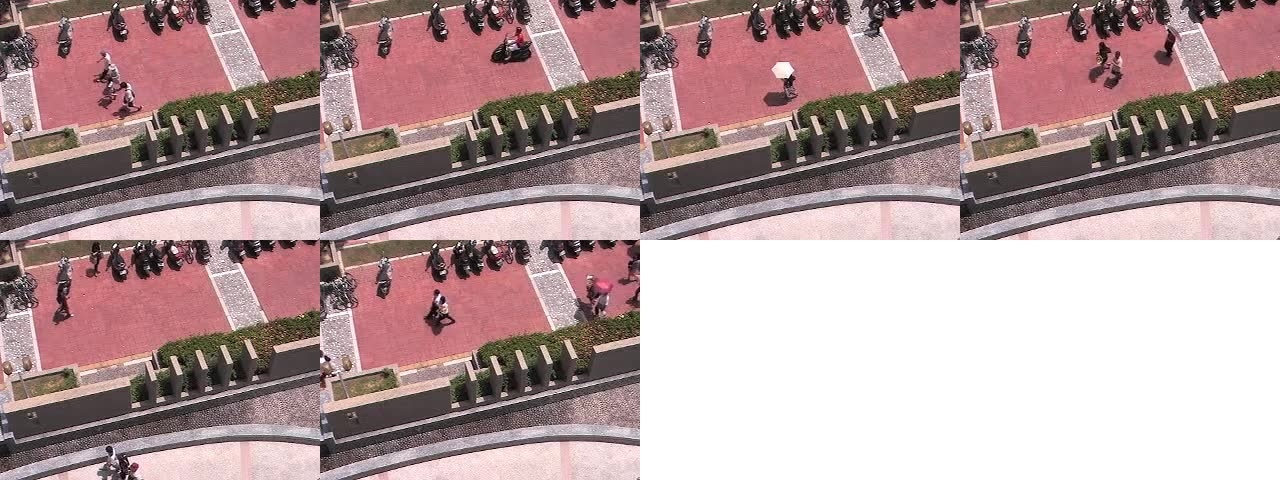
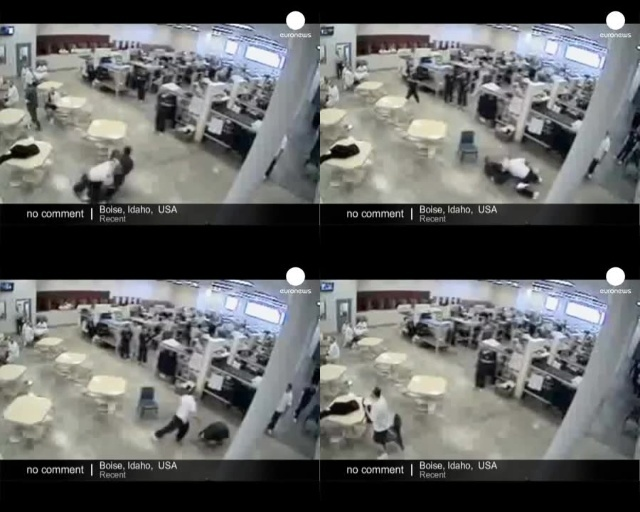
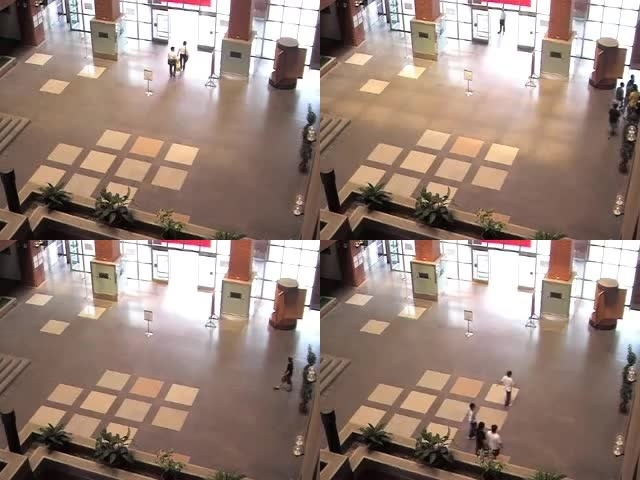
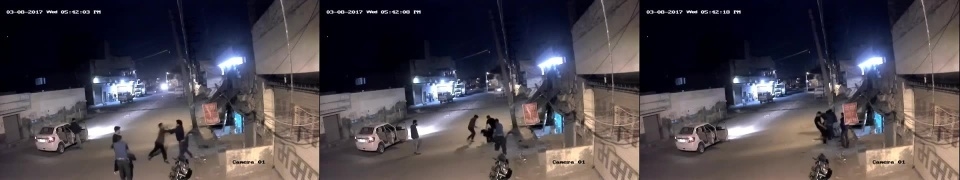
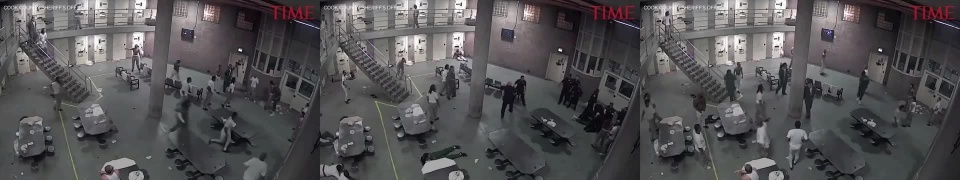
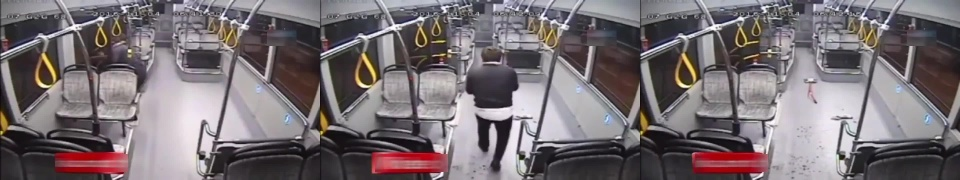
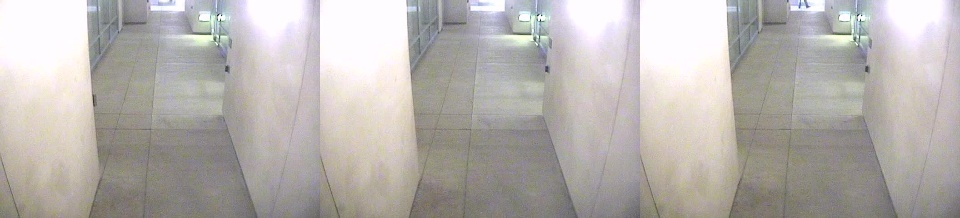
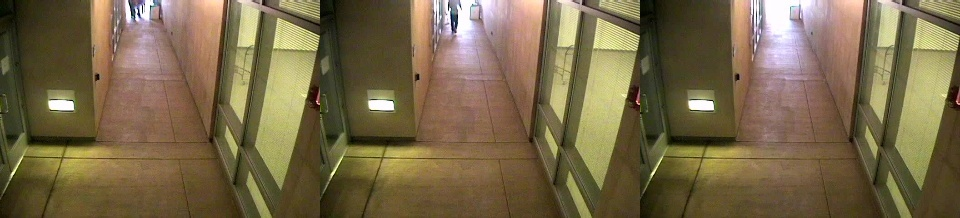
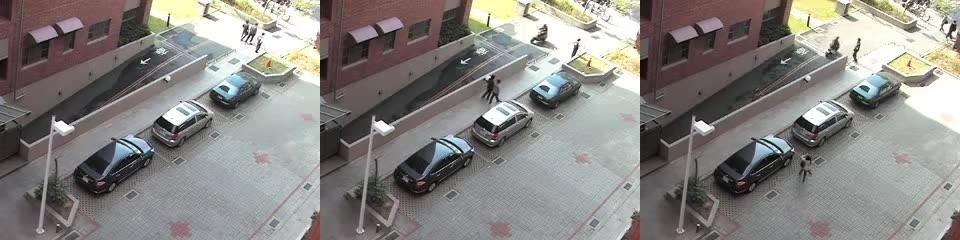

In [19]:
df.vis.component_gallery(num_images=10)

## Caption images automatically

  0%|                                                                                                                                           | 0/10 [00:00<?, ?it/s]/Users/dannybickson/homebrew/lib/python3.8/site-packages/transformers/generation/utils.py:1288: UserWarning: Using `max_length`'s default (20) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 25206.15it/s]


Stored outliers visual view in  out_frames/galleries/outliers.html



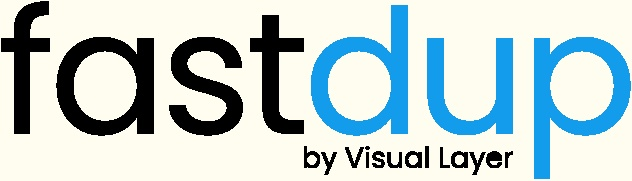
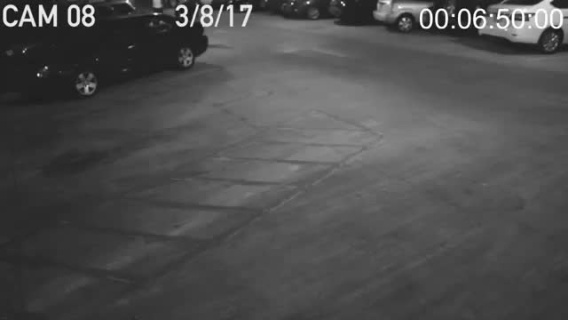
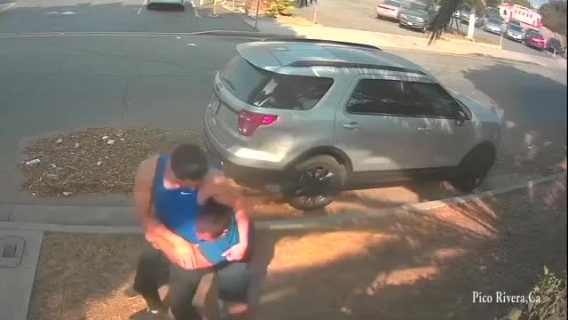
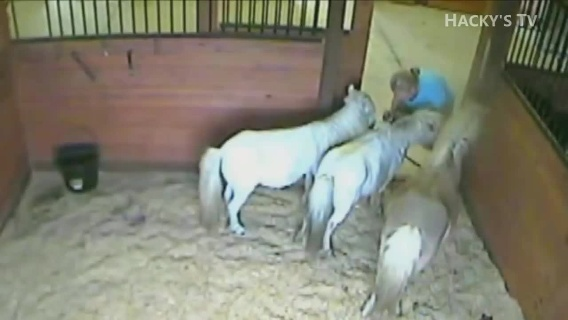
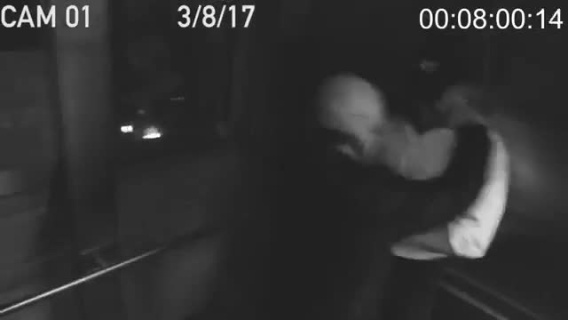
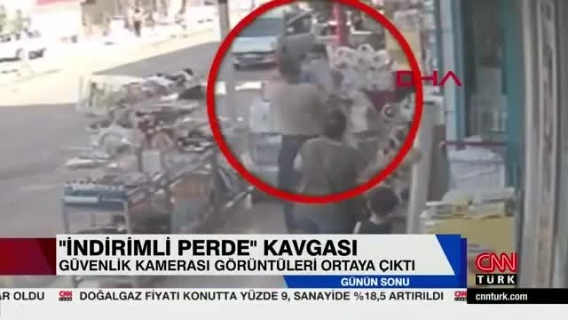
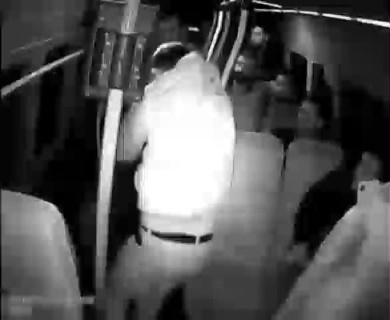
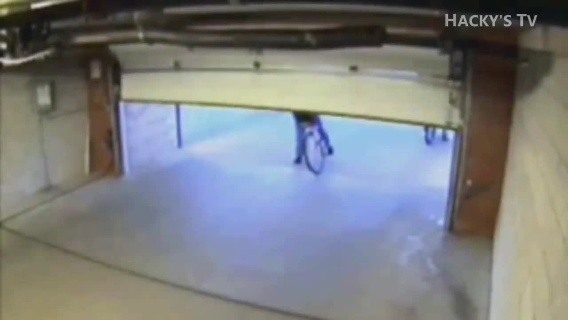
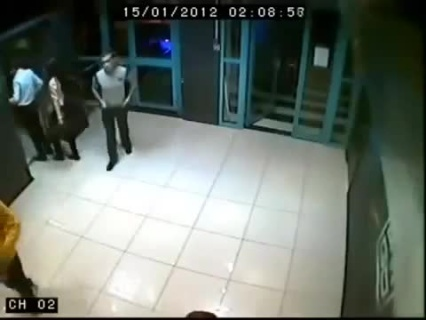
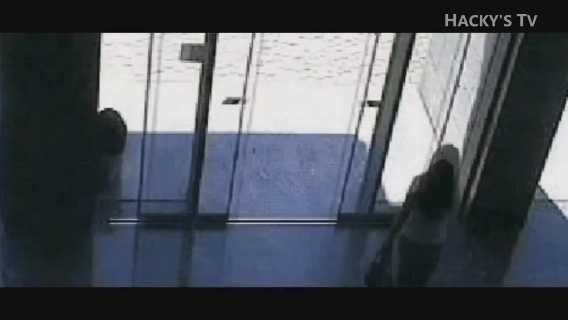
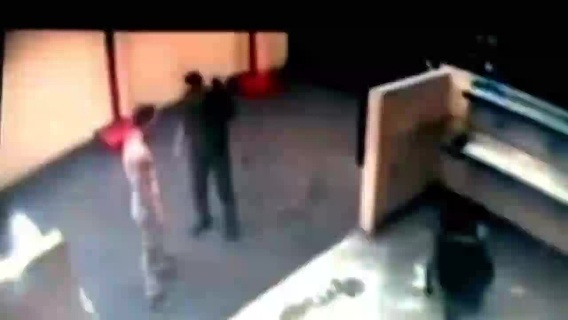

In [24]:

df.vis.outliers_gallery(num_images=10, label_col='automatic2')

In [25]:
# In the above reports the captions are given under the "label" field name

## Classify indoors/outdoors

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 24877.25it/s]


Stored outliers visual view in  out_frames/galleries/outliers.html



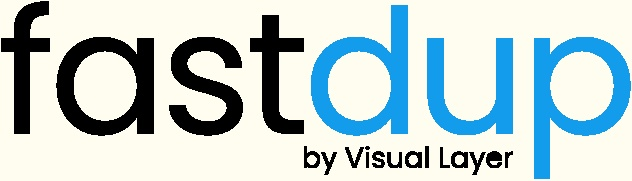
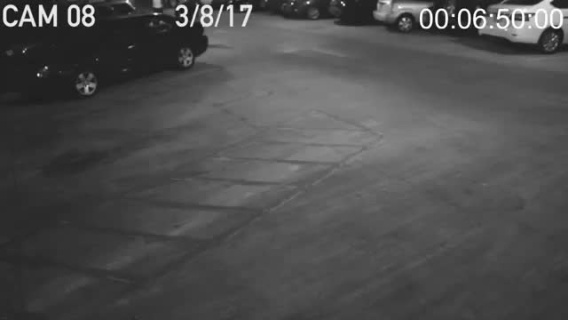
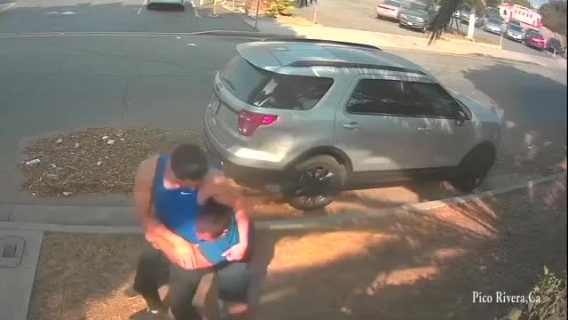
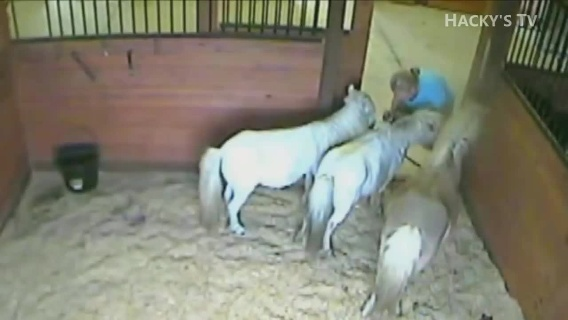
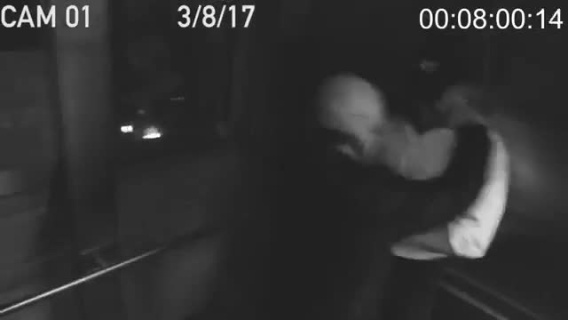
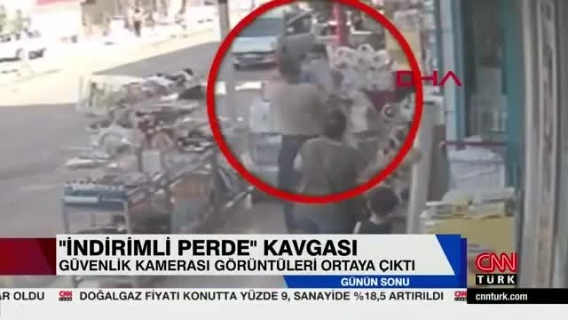
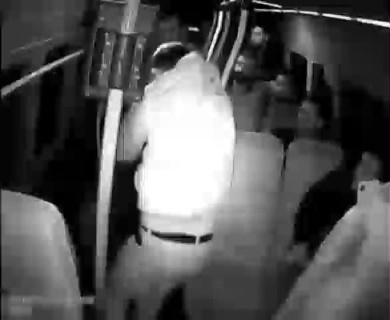
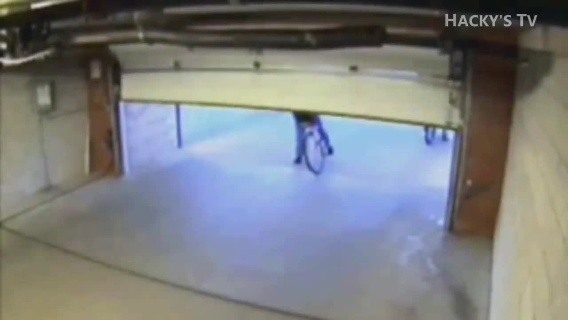
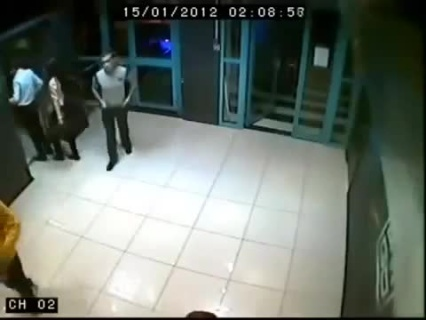
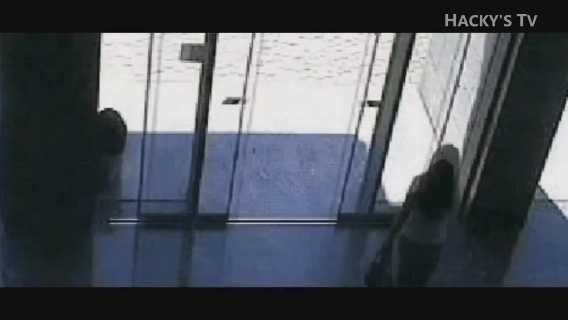
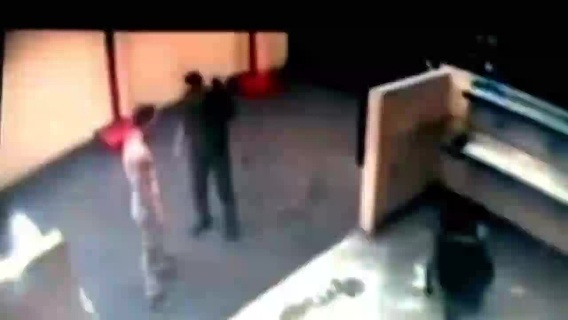

In [27]:
df.vis.outliers_gallery(num_images=10, label_col='indoors_outdoors')

In [28]:
# As can be seen the indoors/outdoors classifier is 90% correct on the above example